This is a fairly small data set containing only 150 rows and 4 features. It is the ideal data set to get your hands on to start with machine learning.

There are three species of Iris flowers viz. Setosa, Versicolor and Virginica. The problem is to determine the species of the flower on the basis of the four features: sepal length, sepal width, petal length and petal width.

Lets start by importing the required libraries.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
%matplotlib inline

We will use Pandas to read the data set into a pandas data frame.

Numpy will be used to make the arrays that will be fed to the machine learning model.

Seaborn will be used for making visualizations.

We will talk about the other libraries shortly.

The following code will read the csv file into a pandas data frame:


# 1.Data read on python

In [95]:
df=pd.read_csv("Iris.csv")
#df

You might be required to pass the complete file path as the argument. Next, we check if the dataframe has been created successfully or not by using the head function, which shows the first 5 rows of the dataframe.

In [96]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


So, the first column is just numbering of the rows. Hence, it is not required. We will remove it from our dataframe.

# 2.Data Clining(missing value,info,describe)

To check the missing value

In [97]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [98]:
dfx=df.iloc[:,0:5]
#dfx

In [99]:
dfx.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let’s try to visualize our data. We will make a scatter plot with lmplot function of seaborn package.

In [100]:
b=dfx.describe()
b

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
c=dfx.info()
c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# 3.Data Visualisation(scatter,correlation matrix,and interpretation)

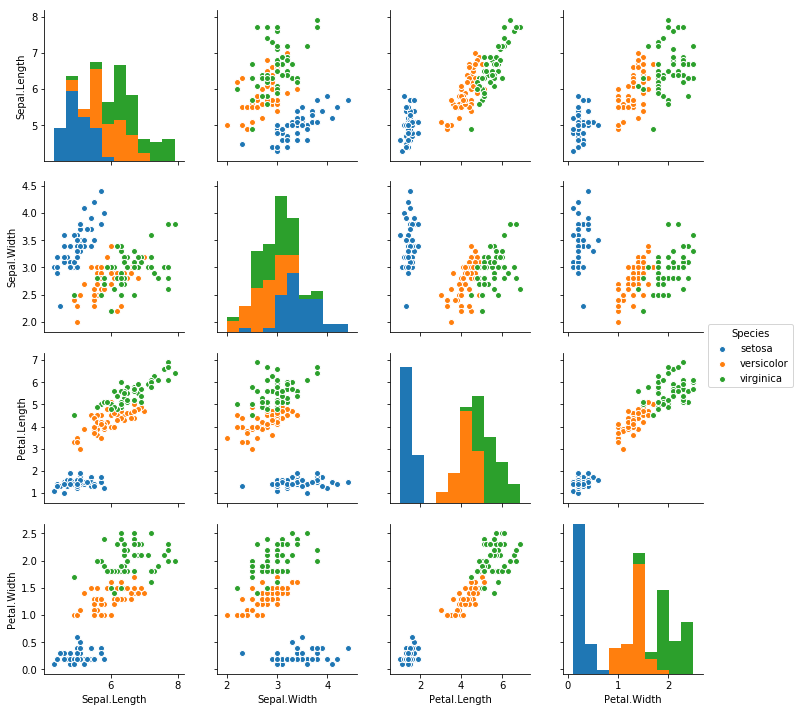

In [102]:
sns.pairplot(data=df, hue="Species")

Now we can clearly see the relationships among different attributes. We can safely assume that is should be fairly easy to predict the flower species from these attributes as clustering is not difficult to visualize.
The attributes which are used for predicting are called Features and the value that is predicted is called Label
So now we will make two arrays. Array ‘X’ will represent all of our features (sepal length, sepal width, petal length and petal width) and array ‘y’ will represent our label (Species).


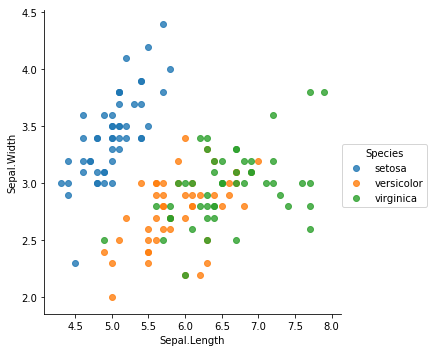

In [103]:
sns.lmplot("Sepal.Length", "Sepal.Width", data=df, hue="Species", fit_reg=False)

This is a scatter plot between Sepal length and Sepal width. Different species are plotted with different colors using the hue attribute. Let’s make a similar plot for Petal length and width.

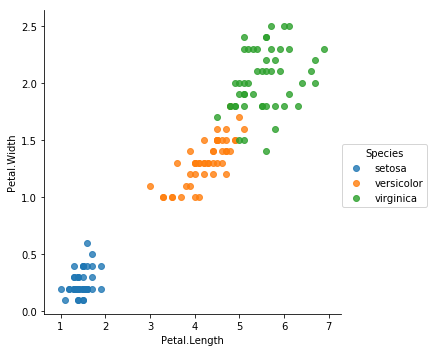

In [104]:
sns.lmplot("Petal.Length", "Petal.Width", data=df, hue="Species", fit_reg=False) 

It is very easy to see clustering in this plot.

# 4. Split Data into train and test data

In [105]:
x=df.iloc[:,0:4]
#x


In [106]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
y=df.loc[:,["Species"]]
#y

In [108]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Next, we will split our data set into training data and testing data.

The training data is used to train the machine learning model and testing data is used to test the accuracy of the model. This splitting is conveniently performed by the train_test_split method available in sklearn.cross_validation library. The code is:


In [109]:
A=x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


X_train and y_train represent the training features and training label respectively.

X_test and y_test represent the testing features and testing label respectively.

The parameter test_size defines the fraction of total data to be used as test data. Here, we are using 20% of the data as test data, and remaining 80% as training data.
Next, we will define our Classifier and call it clf.


# 5.fit naive bayes model on train data(x_train,y_train)

In [110]:
priya= MultinomialNB()
priya.fit(x_train, y_train)

C:\Users\reliance digita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 6.predict y_test

In [111]:
pred = priya.predict(x_test)
accuracy= accuracy_score(pred,y_test)
accuracy

0.9333333333333333

# 7.Confusion matrix

In [112]:
mat = confusion_matrix(pred, y_test)
mat

array([[ 7,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 11]], dtype=int64)

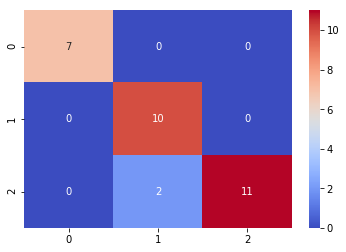

In [113]:
sns.heatmap(mat,cmap="coolwarm",annot=True)

# Fit the anather algorithms

# KNN Classifier

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

C:\Users\reliance digita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [115]:
pred1 = knn.predict(x_test)
print(accuracy_score(y_test,pred1))

0.9


# Confusion Matrix

In [116]:
mat1 = confusion_matrix(pred1, y_test)
mat1

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 10]], dtype=int64)

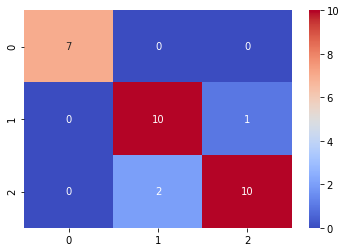

In [117]:
sns.heatmap(mat1,cmap="coolwarm",annot=True)

In [118]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    preddddd= knn.predict(x_test)
    accuracyyy=accuracy_score(preddddd,y_test)
    error.append(1-accuracyyy)
print(error)

[0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.033333333333333326]


C:\Users\reliance digita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\reliance digita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\reliance digita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\reliance digita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\reliance digita\Anaconda3\lib\site-packages

Text(0,0.5,'Mean Error')

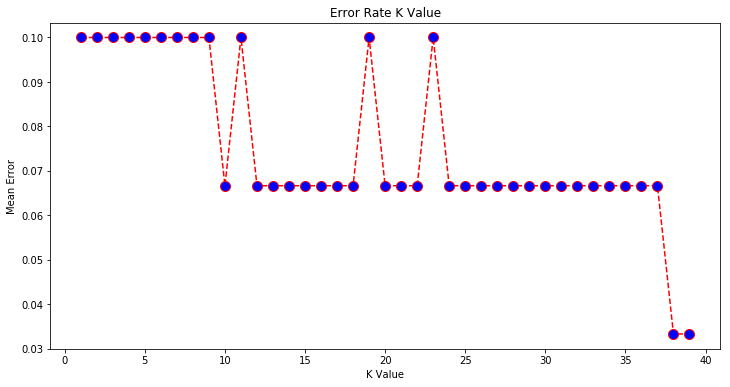

In [119]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  


in this diagram we show,when Mean Error is minimum,then we choose k-value.

# SVM Classifier

In [120]:
SVM = svm.SVC(kernel='linear',C =1.0)
SVM
SVM.fit(x_train, y_train)

C:\Users\reliance digita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
predd2 =SVM.predict(x_test)
print(accuracy_score(y_test,predd2))

0.9333333333333333


In [122]:
mat2 = confusion_matrix(predd2, y_test)
mat2

array([[ 7,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 11]], dtype=int64)

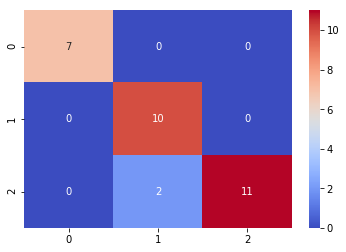

In [123]:
sns.heatmap(mat2,cmap="coolwarm",annot=True)

# Logistic Regression

In [124]:
clf = LogisticRegression()

Most of the machine learning algorithms are implemented in the python’s scikit learn (sklearn) package. In this tutorial, we are using the simplest one for classification, that is, Logistic Regression. Don’t get confused by the name, it is really a classification algorithm and cannot be used for regression.
Now, we will use the fit function to train our classifier with the training data.


In [125]:
clf.fit(x_train, y_train)

C:\Users\reliance digita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

To check the accuracy, we will use the score function on our testing data.

In [126]:
conf = clf.score(x_test, y_test)  

conf stores the accuracy of our model. Let’s print it and check our model’s confidence value.

In [127]:
print(conf)

0.9666666666666667


That is an awesome accuracy score.

However, consecutive runs of the program might give you slightly varying confidence values because the training and testing data will be different.
